<a href="https://colab.research.google.com/github/FrannGallo/SistemaRecomm/blob/main/Sprint_3_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistema de recomendacion de animes

### IMPORTES

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### LLamamos todos los archivos csv descargados

In [7]:
animelist= pd.read_csv('/content/drive/MyDrive/Data Science 2023/Sprints/Sprint 3/animelist.csv')

In [4]:
#Vamos a limitar el dataset a los animes populares
animes_p = animelist.groupby(["anime_id"], as_index=False)["rating"].count()

In [5]:
# Renombrar la columna resultante como "Ratings Count"
animes_p = animelist.rename(columns={"rating": "Ratings Count"})

In [6]:
animes_p

,user_id,anime_id,Ratings Count,watching_status,watched_episodes
0,0,67,9,1,1
1,0,6702,7,1,4
2,0,242,10,1,4
3,0,4898,0,1,1
4,0,21,10,1,0
...,...,...,...,...,...
109224742,353404,507,7,2,2
109224743,353404,392,9,2,112
109224744,353404,882,6,2,1
109224745,353404,883,8,2,1


### Vamos a buscar los 10000 animes mas populares para que los demas no sesguen tanto que no tienen tantos raitngs

In [ ]:
#En colab no lo corre. lo hago en local y subo los datos que nos importan

In [4]:
animes_p= pd.read_csv('/content/drive/MyDrive/Data Science 2023/Sprints/Sprint 3/10000populares.csv')
users_a= pd.read_csv('/content/drive/MyDrive/Data Science 2023/Sprints/Sprint 3/25kusers.csv')
interactions_selected= pd.read_csv

In [5]:
animes_p=list(animes_p['anime_id'])
users_a=list(users_a)


In [6]:
interactions_selected = animelist[['user_id', 'anime_id', 'rating','watching_status']]

NameError: ignored

In [ ]:
interactions_selected = interactions_selected[interactions_selected['anime_id'].isin(animes_p)]

In [1]:
interactions_selected.anime_id.nunique()

NameError: ignored

In [8]:
interactions_selected.anime_id.nunique()
interactions_selected

,user_id,anime_id,rating,watching_status
0,0,67,9,1
1,0,6702,7,1
2,0,242,10,1
3,0,4898,0,1
4,0,21,10,1
...,...,...,...,...
109224742,353404,507,7,2
109224743,353404,392,9,2
109224744,353404,882,6,2
109224745,353404,883,8,2


Para que podamos correr el notebook con los recursos disponibles, limitaremos la cantidad de usuarios.

Vamos a seleccionar 20.000 usuarios random (no nos alcanza la ram que nos da colab para más que esto)

In [7]:
import random
random.seed(0)

selected_users = random.sample(list(interactions_selected['user_id'].unique()), k=20000)     #Elegimos una muestra de 20000 porque es lo maximo que nos deja

interactions_selected = interactions_selected[interactions_selected['user_id'].isin(selected_users)]

interactions_selected.to_csv('/content/drive/MyDrive/Data Science 2023/Sprints/Sprint 3/anime20000v1.csv', index=False)

In [9]:
interactions_selected

,user_id,anime_id,rating,watching_status
2568,12,32301,0,1
2569,12,857,0,1
2570,12,25013,0,1
2571,12,34051,0,1
2572,12,32171,0,1
...,...,...,...,...
109223353,353396,339,0,6
109223354,353396,7311,0,6
109223355,353396,2001,0,6
109223356,353396,33352,0,6


### LLAMAMOS EL CSV DE ESTUDIO

In [5]:
interactions_selected= pd.read_csv('/content/drive/MyDrive/Data Science 2023/Sprints/Sprint 3/interactions_selected.csv')
interactions_selected

KeyboardInterrupt: ignored

In [11]:
interactions_selected['anime_id'].nunique()

10000

### Vamos a elegir nuestro train test son  109 millones de datos por lo que vamos a tomar un muestra de 200mil datos

In [4]:
# train = animelist.sample(n=20000, random_state=43)
# print(train.shape)
# test=animelist.sample(n=25000, random_state=43)
# test=test.iloc[15000:24999,:]
# print(test.shape)

In [12]:
from sklearn.model_selection import train_test_split

In [6]:
interactions_selected.drop(columns= 'watching_status')

,user_id,anime_id,rating
0,12,32301,0
1,12,857,0
2,12,25013,0
3,12,34051,0
4,12,32171,0
...,...,...,...
6635529,353396,339,0
6635530,353396,7311,0
6635531,353396,2001,0
6635532,353396,33352,0


In [13]:
train, test = train_test_split(interactions_selected, test_size=0.2, random_state=42)
train=train.drop(columns= 'watching_status')
print(train.user_id.nunique())
test.user_id.nunique()   #Ejecutamos esta linea o la de arriba, si no se pisan

25000


25000

In [14]:
print(train.user_id.nunique())
test.user_id.nunique()

25000


25000

Vemos si no tenemos alguno de test en train, eso haria que los que no coiciden tendremos que hacerle un coldstart( Les recomednaremos los animes mas populares del momento)

In [15]:
test[~test.user_id.isin(train.user_id.unique())].user_id.nunique()      #isin se fija si un valor esta en el dataframe, si esta, lo marca como true, si no False, como busca los que no ~
#Practicamente todos, pero con el dataset completo, tenemos mejores resultados jeje
#Nos dice todos los usuarios que no estan en el set de train

0

In [17]:
#Tiramos los duplicados
test= test.drop_duplicates()
train=train.drop_duplicates()
train

,Unnamed: 0,user_id,anime_id,rating
24868226,82776471,268041,32182,9
15532456,51486712,166917,2798,6
10689640,35249659,114397,34350,4
1404137,4824652,15946,877,0
2296342,7758832,25411,31139,6
...,...,...,...,...
23327850,77744287,251721,24439,7
16094478,53378052,173110,32553,8
23200604,77380738,250647,20939,8
32128435,106646913,344943,17437,0


In [ ]:
# Pivoteamos la tabla, cambiamos columnas por indices y damos vuelta
interactions_matrix = train.pivot(index="user_id", columns="anime_id", values="rating")

In [11]:
interactions_matrix.head() #Tememos que llenar los NaN con nulos que son las peliculas que no vieron
interactions_matrix.shape

(19976, 16864)

In [12]:
interactions_matrix = interactions_matrix.fillna(0)

# Apartir de aca importo lo que creaba desde visual code porque si no me tira error collab
Importamos csv:
* Train
* Test
* interactions_matrix
* Interactions_selected

In [3]:
interactions_selected= pd.read_csv('/content/drive/MyDrive/Data Science 2023/Sprints/Sprint 3/interactions_selected.csv')

In [4]:
train= pd.read_csv('/content/drive/MyDrive/Data Science 2023/Sprints/Sprint 3/train.csv')
test= pd.read_csv('/content/drive/MyDrive/Data Science 2023/Sprints/Sprint 3/test.csv')

In [5]:
interactions_matrix= pd.read_csv('/content/drive/MyDrive/Data Science 2023/Sprints/Sprint 3/interactions_matrix.csv')

In [6]:
interactions_matrix=interactions_matrix.set_index('user_id',inplace=False)
interactions_matrix

,1,5,6,7,8,15,16,17,18,19,...,47639,47778,47790,48316,48375,48405,48413,48417,48418,48438
user_id,,,,,,,,,,,,,,,,,,,,,
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,8.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353365,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Transformamos la matris por mucha dispercion y gran cantidad de datos

In [7]:
from scipy.sparse import csr_matrix

In [8]:
interactions_matrix_csr = csr_matrix(interactions_matrix.values)

In [9]:
interactions_matrix_csr      #El modelo necesita una matiz sparsida para funcionar

<25000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 14271851 stored elements in Compressed Sparse Row format>

La siguiente celda generará un diccionario que nos servirá como índice más adelante.

Tiene como keys el id de cada usuario y como valor el indice (número de fila en la matriz)

Y el diccionario para futura referencia:
Para el entrenamiento usamos los 25000 usuarios y los 10000 animes pero
vamos a recortar el la cantidad de usuarios a 100000 para las recomendaciones

In [49]:
L=len(interactions_selected.index) #13095021 la ultima posicion del usuario 140765 que es el usuario 10000 en la matriz de interaccion

In [93]:
interactions_selected[interactions_selected['user_id']== 9991]

,Unnamed: 0,user_id,anime_id,rating,watching_status
841799,2961544,9991,35180,0,1
841800,2961545,9991,36793,0,1
841801,2961546,9991,38735,0,1
841802,2961547,9991,9776,0,1
841803,2961548,9991,36039,6,1
...,...,...,...,...,...
843489,2963266,9991,26165,0,6
843490,2963267,9991,32995,0,6
843491,2963268,9991,10495,0,6
843492,2963269,9991,11319,0,6


In [56]:
interactions_selected_2=interactions_selected.iloc[0:13095021]

In [114]:
interactions_matrix_2=interactions_matrix.iloc[0:10000,:]
interactions_matrix_2

,user_id,1,5,6,7,8,15,16,17,18,...,47639,47778,47790,48316,48375,48405,48413,48417,48418,48438
0,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19,8.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,140700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,140739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,140751,9.0,8.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,140764,0.0,0.0,7.0,0.0,0.0,0.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
user_id = list(interactions_matrix.index)
user_dict = {}
counter = 0
for i in user_id:
    user_dict[i] = counter
    counter += 1

In [11]:
item_id = list(interactions_matrix.columns)
item_dict = {}
counter = 0
for i in item_id:
    item_dict[i] = counter
    counter += 1

In [112]:
#user_dict

## Vamos a generar el modelo predictivo

In [19]:
pip install lightfm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.4/316.4 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lightfm: filename=lightfm-1.17-cp310-cp310-linux_x86_64.whl size=808330 sha256=d0e875d72719cdd15a908e4a2b03b9482a9a5387bee5f4261a673fc0e884257b
  Stored in directory: /root/.cache/pip/wheels/4f/9b/7e/0b256f2168511d8fa4dae4fae0200fdbd729eb424a912ad636
Successfully built lightfm


In [12]:
from lightfm import LightFM

In [14]:
model = LightFM(learning_rate=0.05,
                no_components=100)

In [15]:
model = model.fit(interactions_matrix_csr,
                  epochs=20, verbose=True)

Epoch: 100%|██████████| 20/20 [24:16<00:00, 72.85s/it]


In [16]:
pip install joblib

In [13]:
import joblib

In [18]:
joblib.dump(model,'/content/drive/MyDrive/Data Science 2023/Sprints/Sprint 3/modelo.pkl')

['/content/drive/MyDrive/Data Science 2023/Sprints/Sprint 3/modelo.pkl']

In [14]:
model= joblib.load('/content/drive/MyDrive/Data Science 2023/Sprints/Sprint 3/modelo.pkl')

Y ahora definimos la funcion para obtener recomendaciones para un usuario en específico:

In [15]:
import numpy as np

In [16]:
def recomm(model, interactions, user_id, user_dict, item_dict, nrec_items = 20, show = True):     #nrec numero de recomendaciones

    n_users, n_items = interactions.shape         #Cantidad de usuarios cantidad e items
    user_x = user_dict[user_id]                   #Arma el directorio de usuarios

    scores = pd.Series(model.predict(user_x,np.arange(n_items)))
    scores.index = interactions.columns
    scores = list(pd.Series(scores.sort_values(ascending=False).index))

    known_items = list(pd.Series(interactions.loc[user_id,:] \
                                [interactions.loc[user_id,:] > 0].index).sort_values(ascending=False))

    #Filtro de items que ya leyó el usuario
    scores = [x for x in scores if x not in known_items]
    recomms = scores[0:nrec_items]

    if show == True:
        print ("User: " + str(user_id))
        print("Known Likes:")
        counter = 1
        for i in known_items:
            print(str(counter) + '- ' + str(i))
            counter+=1

        print("\n Recommended Items:")

        counter = 1
        for i in recomms:
            print(str(counter) + '- ' + str(i))
            counter+=1
    return recomms

Probamos la función para un usuario al azar. Al poner la opción show=True nos imprime los known likes y recomms.



In [19]:
recomms_test = recomm(model, interactions_matrix, 10000 , user_dict, item_dict, show=True)

User: 10000
Known Likes:
1- 9963
2- 9941
3- 9911
4- 9798
5- 9756
6- 9733
7- 972
8- 9708
9- 9515
10- 9513
11- 95
12- 9493
13- 949
14- 9471
15- 9361
16- 934
17- 9260
18- 9170
19- 9135
20- 9130
21- 9040
22- 901
23- 9000
24- 900
25- 8985
26- 8934
27- 8918
28- 8915
29- 890
30- 89
31- 8888
32- 8857
33- 885
34- 88
35- 875
36- 87
37- 86
38- 853
39- 8516
40- 85
41- 849
42- 8460
43- 8348
44- 8331
45- 8310
46- 8246
47- 820
48- 82
49- 813
50- 81
51- 8074
52- 801
53- 800
54- 80
55- 793
56- 791
57- 790
58- 782
59- 781
60- 7805
61- 780
62- 777
63- 7762
64- 7723
65- 7711
66- 761
67- 759
68- 7456
69- 743
70- 7338
71- 7311
72- 731
73- 73
74- 72
75- 7113
76- 71
77- 7060
78- 7059
79- 7044
80- 6956
81- 6946
82- 6922
83- 6880
84- 6746
85- 6675
86- 666
87- 665
88- 6637
89- 6624
90- 6573
91- 6548
92- 6438
93- 6399
94- 6372
95- 6347
96- 6336
97- 6325
98- 6288
99- 6231
100- 6198
101- 6172
102- 6171
103- 617
104- 6151
105- 6115
106- 6
107- 5947
108- 585
109- 578
110- 572
111- 570
112- 5681
113- 565
114- 5630
115

In [20]:
recomms_test

['11759',
 '16508',
 '1536',
 '30279',
 '19841',
 '31966',
 '9254',
 '5116',
 '1576',
 '31244',
 '22335',
 '30842',
 '31044',
 '15811',
 '20509',
 '5082',
 '8078',
 '21899',
 '14817',
 '11113']

Si queremos ver el nombre de estos libros, podemos buscar en el dataset de metadata

# Métricas

Ahora para medir métricas, necesitamos:

1. Generar recomendaciones para todos los usuarios
2. Comparar lo que recomendamos contra lo que los usuarios realmente vieron (set de test).


Comencemos generando recomendaciones para todos los usuarios.

Nuestra función (recomm) sirve para generar recomendaciones personalizadas a usuarios para los cuales tenemos datos en el set de train.

Para usuarios cold start (que no aparecen en el set de train), debemos buscar alguna alternativa. En este caso les recomendaremos los libros con rating promedio más alto.

In [21]:
#Esta linea busca los promedios de los anime y saca los 10 primero, son las peliculas que vamos a recomendar si tenemos un coldstar
# que son aquellos usuarios que estan en el set de test pero no en el set de train, como no tenemos datos sobre ellos,
#les recomendamos el top 10 mejor rankeadas, tambien pueden ser las 10 mas vistas y asi
cold_start_recomms = train.groupby("anime_id").agg({"rating": "mean"})\
                      .sort_values(by="rating", ascending=False)\
                      .head(10)\
                      .index\
                      .to_list()

A todos los usuarios cold start les recomendaremos:

In [22]:
cold_start_recomms

[30276, 16498, 5114, 1535, 2904, 32281, 199, 9253, 1575, 19815]

Ahora generemos recomendaciones para todos los usuarios.

Primero comenzamos armando un listado de usuarios "non cold" a los cuales les daremos recomms personalizadas.

In [25]:
users = interactions_matrix.index.unique() #Estos son todos los usuarios que hay en nuestro data ser
non_cold_users = train.user_id.unique()          #Como vemos ahi los que no son cold, que son a los que le vamos a recomendar, son practimente todos
# Menos 24 que tendrian coldstar
print(len(users), len(non_cold_users))

25000 25000


In [ ]:
from tqdm import tqdm
recomms_dict = {
    "user": [],
    "recomms": [],
    "cold": []
}

for user in tqdm(users):

  # Recomms personalizadas
  if user in non_cold_users:
    user_recomms = recomm(model, interactions_matrix, user, user_dict, item_dict, nrec_items = 20, show = False)
    recomms_dict["user"].append(user)
    recomms_dict["recomms"].append(user_recomms)
    recomms_dict["cold"].append(False) #Para luego tener identificados a los usuarios cold

  # Recomms cold
  else:
    recomms_dict["user"].append(user)
    recomms_dict["recomms"].append(cold_start_recomms)
    recomms_dict["cold"].append(True) #Para luego tener identificados a los usuarios cold

  2%|▏         | 480/25000 [00:59<40:28, 10.10it/s]

Ahora tenemos un diccionario de recomedaciones. Lo vamos a convertir en dataframe para poder manipularlo más fácil (como estamos acostumbrados)

In [120]:
recomms_df = pd.DataFrame(recomms_dict)

In [121]:
recomms_df[recomms_df['cold'] == False]

,user,recomms,cold
0,17,"[11757, 1535, 6547, 30276, 19815, 4224, 9253, ...",False
1,19,"[11757, 1535, 6547, 19815, 31964, 9253, 5114, ...",False
2,42,"[16498, 6547, 30276, 19815, 4224, 31964, 9253,...",False
3,47,"[16498, 6547, 30276, 4224, 31964, 5114, 1575, ...",False
4,60,"[11757, 16498, 1535, 6547, 19815, 31964, 9253,...",False
...,...,...,...
657,9954,"[11757, 16498, 22319, 31043, 20507, 8074, 5081...",False
658,9957,"[6547, 30276, 31964, 5114, 1575, 31240, 10620,...",False
659,9970,"[11757, 1535, 6547, 31240, 30831, 10620, 31043...",False
660,9979,"[11757, 16498, 30276, 19815, 31964, 9253, 5114...",False


In [122]:
recomms_df.user.nunique()

662

In [123]:
recomms_df.cold.value_counts()

False    662
Name: cold, dtype: int64

Ahora tenemos que comparar nuestras recomms contra lo que los usuarios realmente vieron (test).



In [124]:
test.head()

,Unnamed: 0,user_id,anime_id,rating,watching_status
0,39183716,127265,38297,0,1
1,44951831,145883,1818,6,2
2,106282669,343691,32454,6,2
3,50247785,162953,39196,0,3
4,28817180,93352,16774,0,6


Primero ordenamos libros según los ratings (mayor a menor) que dieron los usuarios en el set de test.

Luego, agrupamos y armamos un listado de libros para cada usuario.

Este es el listado "ideal" contra el que vamos a comparar nuestras recomendaciones.

In [125]:
test

,Unnamed: 0,user_id,anime_id,rating,watching_status
0,39183716,127265,38297,0,1
1,44951831,145883,1818,6,2
2,106282669,343691,32454,6,2
3,50247785,162953,39196,0,3
4,28817180,93352,16774,0,6
...,...,...,...,...,...
6574909,75414978,244173,7596,0,2
6574910,72173570,233600,31914,0,6
6574911,31545603,102310,32,7,2
6574912,10880451,35448,8460,0,2


In [126]:
#Esto ordena, por usuario y por raitng (en esa priroridad)
# Y a esto le agrega una columna de
# aca agrupa por usuario y le agrega columna de animes que alla votado
# Como es el set de test, van a ser las peliculas que deberiamos recomendarles
ideal_recomms = test[test.watching_status != 0].sort_values(by="rating", ascending=False)\
                  .groupby(["user_id"], as_index=False)\
                  .agg({"anime_id": "unique"})
print(ideal_recomms.shape)
ideal_recomms

(25000, 2)


,user_id,anime_id
0,17,"[28677, 21863, 20709, 20939, 8516, 10049, 6347..."
1,19,"[30276, 32281, 12115, 1530, 457, 14741, 166, 2..."
2,42,"[877, 21603, 14347, 4224, 147, 8425, 26349, 99..."
3,47,"[16498, 1735, 23755, 32281, 5341, 38000, 36456..."
4,60,"[2605, 892, 24765, 6768, 8675, 31995, 18179, 1..."
...,...,...
24995,353326,"[35247, 29803, 33926, 6547, 4224, 30015, 36999..."
24996,353365,"[32281, 186, 29803, 30296, 43, 45, 32268, 3919..."
24997,353390,"[5141, 910, 6347, 3627, 121, 574, 23283, 23209..."
24998,353395,"[1530, 513, 801, 101, 429, 209, 5681, 32, 1312..."


Ahora vamos a medir MAP. Para esto nos basaremos en este ejemplo: https://github.com/Datathon2021/Recomendador/blob/main/Ejemplos/ejemplo_map.ipynb

Sklearn también tiene funciones para medir NDCG, etc.


Primero que nada, vamos a unir en un mismo dataframe las recomendaciones nuestras con el set ideal.

In [129]:
df_map = ideal_recomms.merge(recomms_df, how="left", left_on="user_id", right_on="user")[["user_id", "anime_id", "recomms"]]
df_map.columns = ["user_id", "ideal", "recomms"]


,user_id,ideal,recomms
0,17,"[28677, 21863, 20709, 20939, 8516, 10049, 6347...","[11757, 1535, 6547, 30276, 19815, 4224, 9253, ..."
1,19,"[30276, 32281, 12115, 1530, 457, 14741, 166, 2...","[11757, 1535, 6547, 19815, 31964, 9253, 5114, ..."
2,42,"[877, 21603, 14347, 4224, 147, 8425, 26349, 99...","[16498, 6547, 30276, 19815, 4224, 31964, 9253,..."
3,47,"[16498, 1735, 23755, 32281, 5341, 38000, 36456...","[16498, 6547, 30276, 4224, 31964, 5114, 1575, ..."
4,60,"[2605, 892, 24765, 6768, 8675, 31995, 18179, 1...","[11757, 16498, 1535, 6547, 19815, 31964, 9253,..."
...,...,...,...
656,9946,"[4181, 5177, 35180, 31933, 34798, 42391, 6675,...","[6547, 30276, 19815, 9253, 1575, 31240, 22319,..."
657,9954,"[11111, 36094, 29589, 35247, 31636, 13663, 378...","[11757, 16498, 22319, 31043, 20507, 8074, 5081..."
658,9957,"[28623, 10408, 395, 226, 2355, 20785, 35507, 1...","[6547, 30276, 31964, 5114, 1575, 31240, 10620,..."
659,9970,"[5114, 578, 35180, 7785, 33051, 6802, 18195, 1...","[11757, 1535, 6547, 31240, 30831, 10620, 31043..."


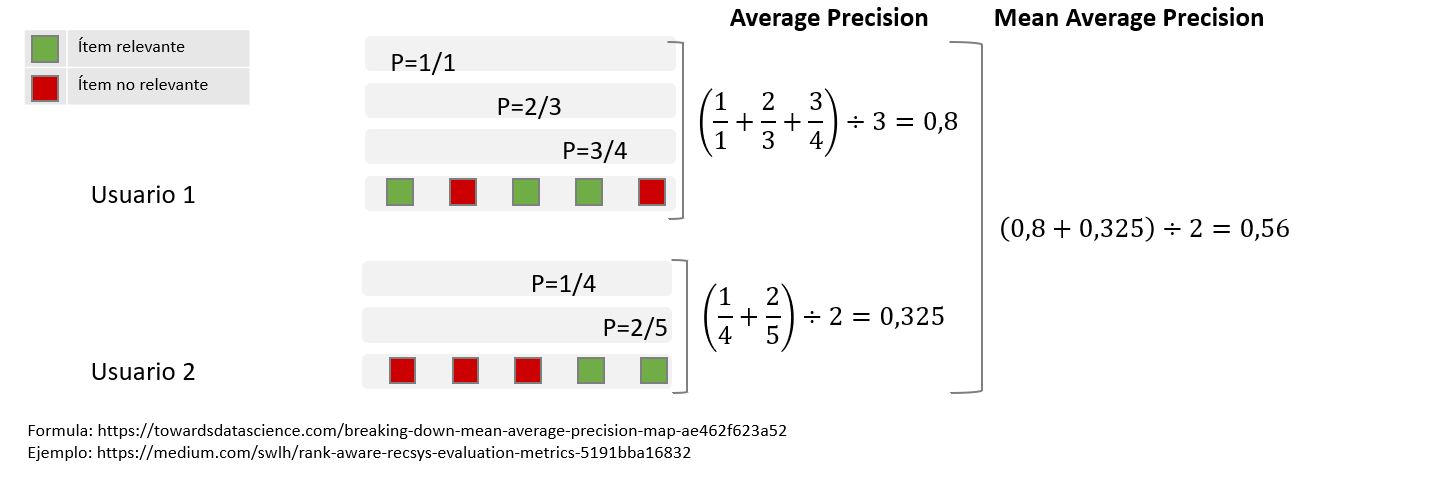

In [130]:
aps = [] # lista vacía para ir almacenando la AP de cada recomendación

for pred, label in tqdm(df_map[["ideal", "recomms"]].values):
  n = len(pred) # cantidad de elementos recomendados
  arange = np.arange(n, dtype=np.int32) + 1. # indexamos en base 1
  rel_k = np.in1d(pred[:n], label) # lista de booleanos que indican la relevancia de cada ítem
  tp = np.ones(rel_k.sum(), dtype=np.int32).cumsum() # lista con el contador de verdaderos positivos
  denom = arange[rel_k] # posiciones donde se encuentran los ítems relantes
  ap = (tp / denom).sum() / len(label) # average precision
  aps.append(ap)


  0%|          | 0/661 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
100%|██████████| 661/661 [00:00<00:00, 4991.83it/s]


In [132]:
MAP = np.mean(aps)
print(f'mean average precision = {round(MAP, 5)}')

mean average precision = 0.0


In [ ]:
#df_map[["ideal", "recomms"]].values

In [ ]:
# np.arange(10, dtype=np.int32) + 1

In [106]:
df_map.tail()

,user_id,ideal,recomms
24995,353326,"[35247, 29803, 33926, 6547, 4224, 30015, 36999...",NaN
24996,353365,"[32281, 186, 29803, 30296, 43, 45, 32268, 3919...",NaN
24997,353390,"[5141, 910, 6347, 3627, 121, 574, 23283, 23209...",NaN
24998,353395,"[1530, 513, 801, 101, 429, 209, 5681, 32, 1312...",NaN
24999,353398,"[35180, 12531, 13125, 25835, 6114, 31173, 2054...",NaN


In [ ]:
np.in1d(pred[:n], label)

In [ ]:
#Vamos a revisar por usuario, como consulta

user=58
ideal_u=df_map[df_map["user_id"] == user].recomms
print(ideal_u[user_dict[user]])

recomm_u=df_map[df_map["user_id"] == user].ideal
print(recomm_u[user_dict[user]])

np.in1d(ideal_u[user_dict[user]] ,recomm_u[user_dict[user]])

### Vamos a utilizar la otra metrica

Ahora vamos a medir MAP. Para esto nos basaremos en este ejemplo: https://github.com/Datathon2021/Recomendador/blob/main/Ejemplos/ejemplo_map.ipynb

Sklearn también tiene funciones para medir NDCG, etc.


In [ ]:
ground_truth= df_map.ideal
recommendations= df_map.recomms
recommendations.apply(np.array)
ground_truth.apply(np.array)

In [ ]:
from sklearn.metrics import ndcg_score

dcgs = [] # lista vacía para ir almacenando la AP de cada recomendación
ndcg= ndcg_score(ground_truth[0][0:20], recommendations[0])
# Calcular el NDCG
ndcg = ndcg_score(ground_truth, recommendations)

print("NDCG Score:", ndcg)
# for ideal, recomms in tqdm(df_map[["ideal", "recomms"]].values):
#   dcg=dcg_score(pred, label)
#   dcgs.append(dcg)